# Выпускной проект

# Введение

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Наша задача — обучить на этих данных модель для прогноза оттока клиентов.

Оператор предоставляет два основных типа услуг:

Cтационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).
Также доступны такие услуги:

Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
Выделенная линия технической поддержки (TechSupport);
Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies). Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

# Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:

contract_new.csv — информация о договоре;
personal_new.csv — персональные данные клиента;
internet_new.csv — информация об интернет-услугах;
phone_new.csv — информация об услугах телефонии.


Файл contract_new.csv

customerID — идентификатор абонента;
BeginDate — дата начала действия договора;
EndDate — дата окончания действия договора;
Type — тип оплаты: раз в год-два или ежемесячно;
PaperlessBilling — электронный расчётный лист;
PaymentMethod — тип платежа;
MonthlyCharges — расходы за месяц;
TotalCharges — общие расходы абонента.


Файл personal_new.csv

customerID — идентификатор пользователя;
gender — пол;
SeniorCitizen — является ли абонент пенсионером;
Partner — есть ли у абонента супруг или супруга;
Dependents — есть ли у абонента дети.


Файл internet_new.csv

customerID — идентификатор пользователя;
InternetService — тип подключения;
OnlineSecurity — блокировка опасных сайтов;
OnlineBackup — облачное хранилище файлов для резервного копирования данных;
DeviceProtection — антивирус;
TechSupport — выделенная линия технической поддержки;
StreamingTV — стриминговое телевидение;
StreamingMovies — каталог фильмов.


Файл phone_new.csv

customerID — идентификатор пользователя;
MultipleLines — подключение телефона к нескольким линиям одновременно.
Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

Данные также находятся в тренажёре, в папке /datasets/.

# План работы

Данный проект исходя из задания охватывает практически все "классические" этапы работы Data Science. Во многом он похож на предыдущие сборные, поэтому, набор шагов по решению задачи, будет схожим с ними.
  - Импорт библиотек и подключение необходимых модулей;
  - Загрузка данных;
  - Первичный осмотр и предобработка данных;
  - Исследовательский и коррелляционный анализ данных;
  - Подготовка данных для дальнейшего обучения моделей;
  - Обучение моделей с использованием пайплайнов;
  - Выбор лучшей модели, её оценка по метрикам и анализ важности её признаков;
  - Общий вывод по проекту и рекомендации заказчику.

# Импорт необходимых библиотек

In [1]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time 
import math
from phik.report import plot_correlation_matrix
from phik import report
import phik
from scipy.stats import randint, uniform
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import randint, uniform
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (auc, roc_curve, roc_auc_score, accuracy_score, 
                             precision_score, recall_score, f1_score)
from sklearn.model_selection import (train_test_split, 
                                     GridSearchCV, RandomizedSearchCV)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import shap

## Загрузка данных и первичный осмотр

In [5]:
try:
    contract = pd.read_csv("contract.csv")
    personal = pd.read_csv("personal.csv")
    internet = pd.read_csv("internet.csv")
    phone = pd.read_csv("phone.csv")
except:
    contract = pd.read_csv("/datasets/contract_new.csv")
    personal = pd.read_csv("/datasets/personal_new.csv")
    internet = pd.read_csv("/datasets/internet_new.csv")
    phone = pd.read_csv("/datasets/phone_new.csv")   

In [6]:
def get_info(data):
    print("Общая информация:")
    print()
    print(data.info())
    print()
    print("*"*50)
    print()
    print("Количество пропусков:")
    print(data.isna().sum())
    print()
    print("*"*50)
    print()
    print("Количество дубликатов:")
    print(data.duplicated().sum())
    print()
    print("*"*50)
    print()
    print(data.describe())
    return data.head(10)

In [7]:
get_info(contract)

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
None

**************************************************

Количество пропусков:
customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

**************************************************

Количество дубликатов:
0

***

customerID   BeginDate     EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01          No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01          No        One year               No   
2  3668-QPYBK  2019-10-01          No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01          No        One year               No   
4  9237-HQITU  2019-09-01          No  Month-to-month              Yes   
5  9305-CDSKC  2019-03-01          No  Month-to-month              Yes   
6  1452-KIOVK  2018-04-01          No  Month-to-month              Yes   
7  6713-OKOMC  2019-04-01          No  Month-to-month               No   
8  7892-POOKP  2017-07-01          No  Month-to-month              Yes   
9  6388-TABGU  2014-12-01  2017-05-01        One year               No   

               PaymentMethod  MonthlyCharges TotalCharges  
0           Electronic check           29.85        31.04  
1               Mailed check           56.95      2071.84  
2               Mailed check           53.85       226.17  
3  Bank transfer (automatic)           42.30       1960.6  
4           Electronic check           70.70        353.5  
5           Electronic check           99.65      1150.96  
6    Credit card (automatic)           89.10      2058.21  
7               Mailed check           29.75       300.48  
8           Electronic check          104.80      3573.68  
9  Bank transfer (automatic)           56.15      1628.35

Так, в df contract выявлены столбцы с неверно определёнными типами данных.
TotalCharges - должен быть вещественным типом данных, а BeginDate и EndDate - датой. Поправим это на этапе предобработки. Посмотрим на остальные датафреймы.

In [8]:
get_info(personal)

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
None

**************************************************

Количество пропусков:
customerID       0
gender           0
SeniorCitizen    0
Partner          0
Dependents       0
dtype: int64

**************************************************

Количество дубликатов:
0

**************************************************

       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


customerID  gender  SeniorCitizen Partner Dependents
0  7590-VHVEG  Female              0     Yes         No
1  5575-GNVDE    Male              0      No         No
2  3668-QPYBK    Male              0      No         No
3  7795-CFOCW    Male              0      No         No
4  9237-HQITU  Female              0      No         No
5  9305-CDSKC  Female              0      No         No
6  1452-KIOVK    Male              0      No        Yes
7  6713-OKOMC  Female              0      No         No
8  7892-POOKP  Female              0     Yes         No
9  6388-TABGU    Male              0      No        Yes

In [9]:
get_info(internet)

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
None

**************************************************

Количество пропусков:
customerID          0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
dtype: int64

**************************************************

Количество дубликатов:
0

*************************

customerID InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0  7590-VHVEG             DSL             No          Yes               No   
1  5575-GNVDE             DSL            Yes           No              Yes   
2  3668-QPYBK             DSL            Yes          Yes               No   
3  7795-CFOCW             DSL            Yes           No              Yes   
4  9237-HQITU     Fiber optic             No           No               No   
5  9305-CDSKC     Fiber optic             No           No              Yes   
6  1452-KIOVK     Fiber optic             No          Yes               No   
7  6713-OKOMC             DSL            Yes           No               No   
8  7892-POOKP     Fiber optic             No           No              Yes   
9  6388-TABGU             DSL            Yes          Yes               No   

  TechSupport StreamingTV StreamingMovies  
0          No          No              No  
1          No          No              No  
2          No          No              No  
3         Yes          No              No  
4          No          No              No  
5          No         Yes             Yes  
6          No         Yes              No  
7          No          No              No  
8         Yes         Yes             Yes  
9          No          No              No

In [10]:
get_info(phone)

Общая информация:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
None

**************************************************

Количество пропусков:
customerID       0
MultipleLines    0
dtype: int64

**************************************************

Количество дубликатов:
0

**************************************************

        customerID MultipleLines
count         6361          6361
unique        6361             2
top     7579-OOPEC            No
freq             1          3390


customerID MultipleLines
0  5575-GNVDE            No
1  3668-QPYBK            No
2  9237-HQITU            No
3  9305-CDSKC           Yes
4  1452-KIOVK           Yes
5  7892-POOKP           Yes
6  6388-TABGU            No
7  9763-GRSKD            No
8  7469-LKBCI            No
9  8091-TTVAX           Yes

Вывод по загрузке и первичному осмотру:
    
По большому счёту данные выглядят неплохо. Есть небольшие проблемы с неверно определённым типом данных в df contract, в остальном, ни явных дубликатов, ни пропусков данные не имеют. Возможно, какие-то проблемы вскроются на этапе предобработки, перейдем к ней.

## Предобработка данных

Начнем со склейки данных в единый дф:

In [11]:
# Объединение DataFrame contract и personal
df_personal = contract.merge(personal, how="left", on="customerID")

# Объединение результата с DataFrame phone
df_phone = df_personal.merge(phone, how="left", on="customerID")

# Объединение результата с DataFrame internet
df = df_phone.merge(internet, how="left", on="customerID")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


In [13]:
df.head(7)

customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   
5  9305-CDSKC  2019-03-01      No  Month-to-month              Yes   
6  1452-KIOVK  2018-04-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  gender  \
0           Electronic check           29.85        31.04  Female   
1               Mailed check           56.95      2071.84    Male   
2               Mailed check           53.85       226.17    Male   
3  Bank transfer (automatic)           42.30       1960.6    Male   
4           Electronic check           70.70        353.5  Female   
5           Electronic check           99.65      1150.96  Female   
6    Credit card (automatic)           89.10      2058.21    Male   

   SeniorCitizen Partner Dependents MultipleLines InternetService  \
0              0     Yes         No           NaN             DSL   
1              0      No         No            No             DSL   
2              0      No         No            No             DSL   
3              0      No         No           NaN             DSL   
4              0      No         No            No     Fiber optic   
5              0      No         No           Yes     Fiber optic   
6              0      No        Yes           Yes     Fiber optic   

  OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
0             No          Yes               No          No          No   
1            Yes           No              Yes          No          No   
2            Yes          Yes               No          No          No   
3            Yes           No              Yes         Yes          No   
4             No           No               No          No          No   
5             No           No              Yes          No         Yes   
6             No          Yes               No          No         Yes   

  StreamingMovies  
0              No  
1              No  
2              No  
3              No  
4              No  
5             Yes  
6              No

В объединённом дф есть пропуски, они связаны с тем, что клиенты не пользовались данными услугами, поставим заглушку:

In [14]:
df = df.fillna('No')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   gender            7043 non-null   object 
 9   SeniorCitizen     7043 non-null   int64  
 10  Partner           7043 non-null   object 
 11  Dependents        7043 non-null   object 
 12  MultipleLines     7043 non-null   object 
 13  InternetService   7043 non-null   object 
 14  OnlineSecurity    7043 non-null   object 
 15  OnlineBackup      7043 non-null   object 
 16  DeviceProtection  7043 non-null   object 


Поскольку, мы будем решать задачу классификации, то столбцы с датой убытия клиента будут не очень удобны для построения модели. Поэтому добавим в данные новый столбец, который содержал бы информацию о том, ушел ли клиент или нет. Значения в столбце будут в двоичном формате. 0 - клиент не ушел; 1 - клиент ушел.

In [16]:
df['EndDate'].unique()

array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

In [17]:
# Создаем новый столбец 'Leave' и устанавливаем значения на основе условия
df['Leave'] = 0  # Изначально устанавливаем все значения в 0
df.loc[df['EndDate'] != 'No', 'Leave'] = 1  # Устанавливаем 1, если EndDate не равно 'No'

# Преобразуем столбец 'Leave' в целочисленный тип (это не обязательно, так как значения уже 0 и 1)
df['Leave'] = df['Leave'].astype(int)

In [18]:
df.head()

customerID   BeginDate EndDate            Type PaperlessBilling  \
0  7590-VHVEG  2020-01-01      No  Month-to-month              Yes   
1  5575-GNVDE  2017-04-01      No        One year               No   
2  3668-QPYBK  2019-10-01      No  Month-to-month              Yes   
3  7795-CFOCW  2016-05-01      No        One year               No   
4  9237-HQITU  2019-09-01      No  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  gender  \
0           Electronic check           29.85        31.04  Female   
1               Mailed check           56.95      2071.84    Male   
2               Mailed check           53.85       226.17    Male   
3  Bank transfer (automatic)           42.30       1960.6    Male   
4           Electronic check           70.70        353.5  Female   

   SeniorCitizen  ... Dependents MultipleLines InternetService OnlineSecurity  \
0              0  ...         No            No             DSL             No   
1              0  ...         No            No             DSL            Yes   
2              0  ...         No            No             DSL            Yes   
3              0  ...         No            No             DSL            Yes   
4              0  ...         No            No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Leave  
0          Yes               No          No          No              No     0  
1           No              Yes          No          No              No     0  
2          Yes               No          No          No              No     0  
3           No              Yes         Yes          No              No     0  
4           No               No          No          No              No     0  

[5 rows x 21 columns]

На этапе первичного осмотра, мы обнаружили, что в дф contract был неверно определен тип данных с датами, самое время это исправить:

In [19]:
# преобразуем тип данных полей с датой
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
# Где `No`  заполним дату на момент выгрузки
df.loc[df.EndDate == 'No', 'EndDate'] = '2020-02-01'
df['EndDate'] = pd.to_datetime(df['EndDate'])

In [20]:
# вычисляем длительность действия договора в днях
df['UsageTime'] = (df['EndDate'] - df['BeginDate']).dt.days

Также у нас была ошибка с определением данных столбца TotalCharges, исправляем:

Попытка запустить код "df['TotalCharges'] = df['TotalCharges'].astype(float)" привела к ошибке:

"could not convert string to float: '' ..."

Видимо в столбце есть значения " ", попробуем вывести их:.

In [21]:
df[df['TotalCharges']==' ']

customerID  BeginDate    EndDate      Type PaperlessBilling  \
488   4472-LVYGI 2020-02-01 2020-02-01  Two year              Yes   
753   3115-CZMZD 2020-02-01 2020-02-01  Two year               No   
936   5709-LVOEQ 2020-02-01 2020-02-01  Two year               No   
1082  4367-NUYAO 2020-02-01 2020-02-01  Two year               No   
1340  1371-DWPAZ 2020-02-01 2020-02-01  Two year               No   
3331  7644-OMVMY 2020-02-01 2020-02-01  Two year               No   
3826  3213-VVOLG 2020-02-01 2020-02-01  Two year               No   
4380  2520-SGTTA 2020-02-01 2020-02-01  Two year               No   
5218  2923-ARZLG 2020-02-01 2020-02-01  One year              Yes   
6670  4075-WKNIU 2020-02-01 2020-02-01  Two year               No   
6754  2775-SEFEE 2020-02-01 2020-02-01  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges  gender  \
488   Bank transfer (automatic)           52.55               Female   
753                Mailed check           20.25                 Male   
936                Mailed check           80.85               Female   
1082               Mailed check           25.75                 Male   
1340    Credit card (automatic)           56.05               Female   
3331               Mailed check           19.85                 Male   
3826               Mailed check           25.35                 Male   
4380               Mailed check           20.00               Female   
5218               Mailed check           19.70                 Male   
6670               Mailed check           73.35               Female   
6754  Bank transfer (automatic)           61.90                 Male   

      SeniorCitizen  ... MultipleLines InternetService OnlineSecurity  \
488               0  ...            No             DSL            Yes   
753               0  ...            No              No             No   
936               0  ...            No             DSL            Yes   
1082              0  ...           Yes              No             No   
1340              0  ...            No             DSL            Yes   
3331              0  ...            No              No             No   
3826              0  ...           Yes              No             No   
4380              0  ...            No              No             No   
5218              0  ...            No              No             No   
6670              0  ...           Yes             DSL             No   
6754              0  ...           Yes             DSL            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
488            No              Yes         Yes         Yes              No   
753            No               No          No          No              No   
936           Yes              Yes          No         Yes             Yes   
1082           No               No          No          No              No   
1340          Yes              Yes         Yes         Yes              No   
3331           No               No          No          No              No   
3826           No               No          No          No              No   
4380           No               No          No          No              No   
5218           No               No          No          No              No   
6670          Yes              Yes         Yes         Yes              No   
6754          Yes               No         Yes          No              No   

     Leave UsageTime  
488      0         0  
753      0         0  
936      0         0  
1082     0         0  
1340     0         0  
3331     0         0  
3826     0         0  
4380     0         0  
5218     0         0  
6670     0         0  
6754     0         0  

[11 rows x 22 columns]

In [22]:
df.head()

customerID  BeginDate    EndDate            Type PaperlessBilling  \
0  7590-VHVEG 2020-01-01 2020-02-01  Month-to-month              Yes   
1  5575-GNVDE 2017-04-01 2020-02-01        One year               No   
2  3668-QPYBK 2019-10-01 2020-02-01  Month-to-month              Yes   
3  7795-CFOCW 2016-05-01 2020-02-01        One year               No   
4  9237-HQITU 2019-09-01 2020-02-01  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges  gender  \
0           Electronic check           29.85        31.04  Female   
1               Mailed check           56.95      2071.84    Male   
2               Mailed check           53.85       226.17    Male   
3  Bank transfer (automatic)           42.30       1960.6    Male   
4           Electronic check           70.70        353.5  Female   

   SeniorCitizen  ... MultipleLines InternetService OnlineSecurity  \
0              0  ...            No             DSL             No   
1              0  ...            No             DSL            Yes   
2              0  ...            No             DSL            Yes   
3              0  ...            No             DSL            Yes   
4              0  ...            No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Leave  \
0          Yes               No          No          No              No     0   
1           No              Yes          No          No              No     0   
2          Yes               No          No          No              No     0   
3           No              Yes         Yes          No              No     0   
4           No               No          No          No              No     0   

  UsageTime  
0        31  
1      1036  
2       123  
3      1371  
4       153  

[5 rows x 22 columns]

Эти 11 записей объединяет одно, их дата начала договора совпадает со строчкой из задания "Информация о договорах актуальна на 1 февраля 2020 года." - т.е. датой выгрузки. Это новые клиенты, их всего 11, в данном случае, они будут мешать, так что просто удалим эти записи.

In [23]:
df = df[df['TotalCharges']!=' ']
df['TotalCharges'] = df['TotalCharges'].astype(float)

Вывод по предобработке:

  - Все дф объедены в единый датафрейм;
  - Явных дубликатов не обнаружено;
  - Пропуски, которые мы получили в результате объединения дф были обработаны заглушкой "No";
  - Тип данных в TotalCharges был исправлен, правда пришлось удалить 11 записей. Это практически никак не повлияет на актуальность анализа, т.к. практически 99% данных после предобработки сохранены.
  - были созданы два новых столбца: бинарный признак ухода клиента (будущий целевой) и количество дней между заключением договора и его расторжением (или на момент выгрузки, если клиент не ушел)

## Исследовательский анализ данных

In [24]:
df.describe()

MonthlyCharges  TotalCharges  SeniorCitizen        Leave    UsageTime
count     7032.000000   7032.000000    7032.000000  7032.000000  7032.000000
mean        64.798208   2118.621822       0.162400     0.156570   899.961320
std         30.085974   2112.736199       0.368844     0.363421   682.738777
min         18.250000     19.050000       0.000000     0.000000    28.000000
25%         35.587500    439.745000       0.000000     0.000000   276.000000
50%         70.350000   1345.275000       0.000000     0.000000   761.000000
75%         89.862500   3239.317500       0.000000     0.000000  1461.000000
max        118.750000   9221.380000       1.000000     1.000000  2314.000000

Воспользуемся функциями, которые я написал ранее для предыдущих проектов:

In [25]:
def plot_num_columns(df):
    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_columns = numeric_columns[numeric_columns != 'id']
    for col in numeric_columns:
        f, [axs_hist, axs_box] = plt.subplots(2, 1,
                                             figsize=(15, 5), 
                                             sharex=True,
                                             gridspec_kw=dict(height_ratios=[4,1]))
        sns.histplot(data=df, x=col, kde=True, ax=axs_hist, color='lightgreen', edgecolor='green')\
            .set(title=f'Гистограмма распределения {col}',
                 ylabel='Количество записей')
        sns.boxplot(data=df, x=col, ax=axs_box, color='lightgreen')\
            .set(xlabel=f'{col}');

In [26]:
def plot_cat_columns(df):
    # Выбираем категориальные столбцы, исключая 'customerID'
    categorical_cols = df.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col != 'customerID']

    num_plots = len(categorical_cols)
    fig, axes = plt.subplots(num_plots, 1, figsize=(15, 5 * num_plots))

    if num_plots == 1:
        sns.countplot(x=categorical_cols[0], data=df, ax=axes, palette="Set1")
        axes.set_title(f'График {categorical_cols[0]}')
        axes.set_xlabel(categorical_cols[0])
    else:
        for i, col in enumerate(categorical_cols):
            sns.countplot(x=col, data=df, ax=axes[i], palette="Set1")
            axes[i].set_title(f'График {col}')
            axes[i].set_xlabel(col)

    plt.tight_layout()
    plt.show()

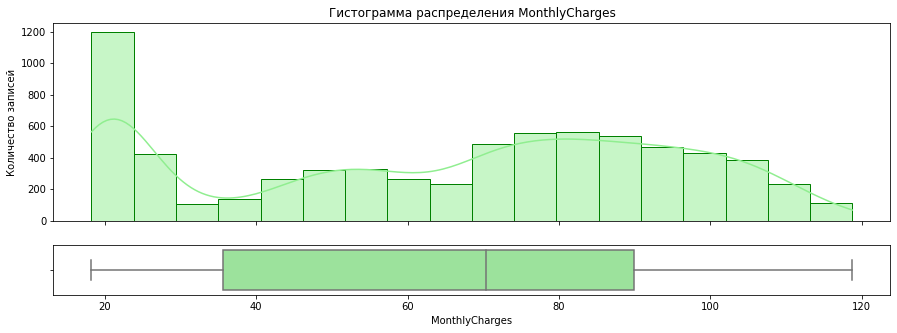

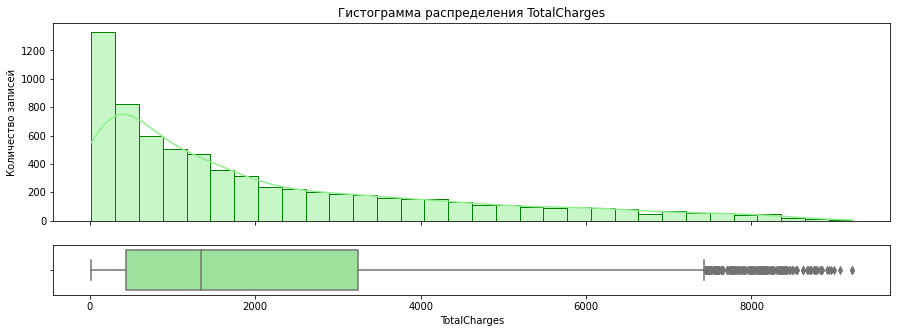

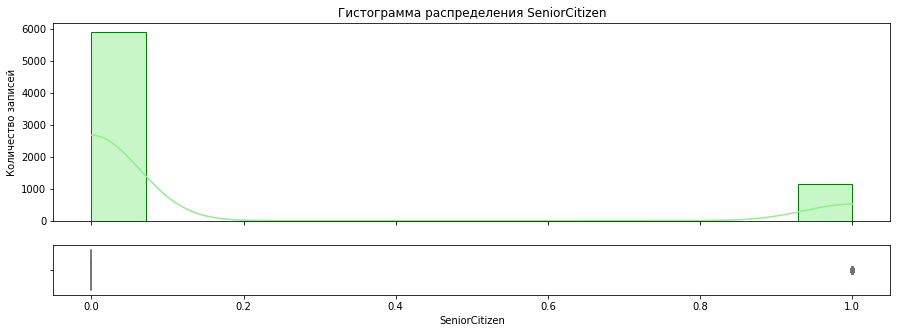

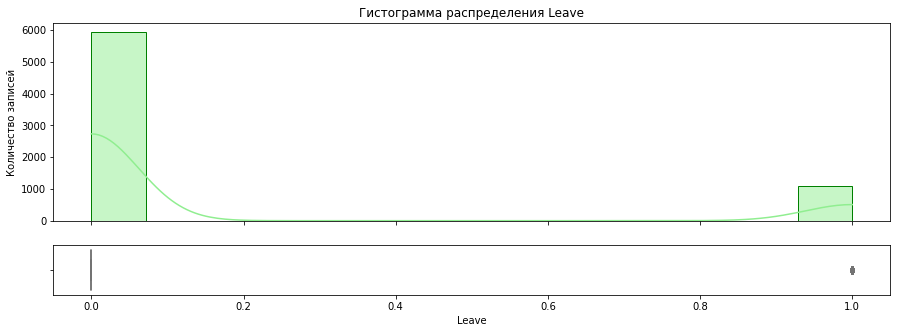

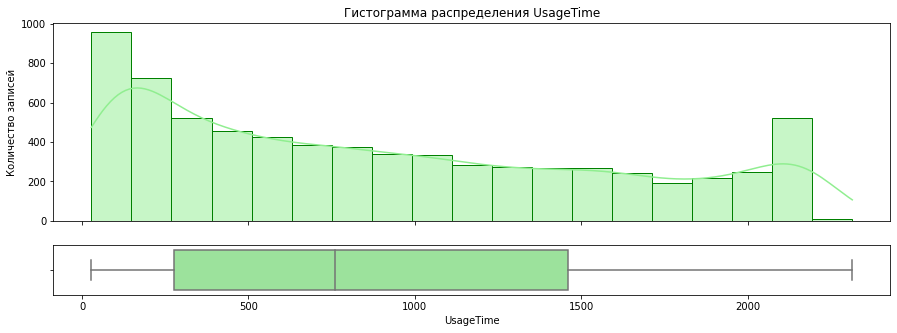

In [27]:
plot_num_columns(df)

Вывод по числовым признакам (а также, категориальным, представленных числом 0 и 1):

    - Распределение MonthlyCharges ассиметричное, имеет всплеск у небольших сум, похоже, что есть несколько мод;
    - Распределение TotalCharges больше напоминает экспоненциальное;
    - Как таковых выбросов не видно, есть значения в TotalCharges которые, исходя из графика выходят из нормального диапазона, но когда речь идет о тратах, не совсем корректно говорить о нормальности;
    - Пенсионеров среди клиентов намного меньше чем других пользователей;
    - Ушедших клиентов в разы меньше, чем тех кто остался, т.к. это целевой признак, и классы разбалансированы, на это следует обратить внимание при построении моделей;
    - Медианное время контракта - 2 года, среднее, чуть меньше 3 лет.
    

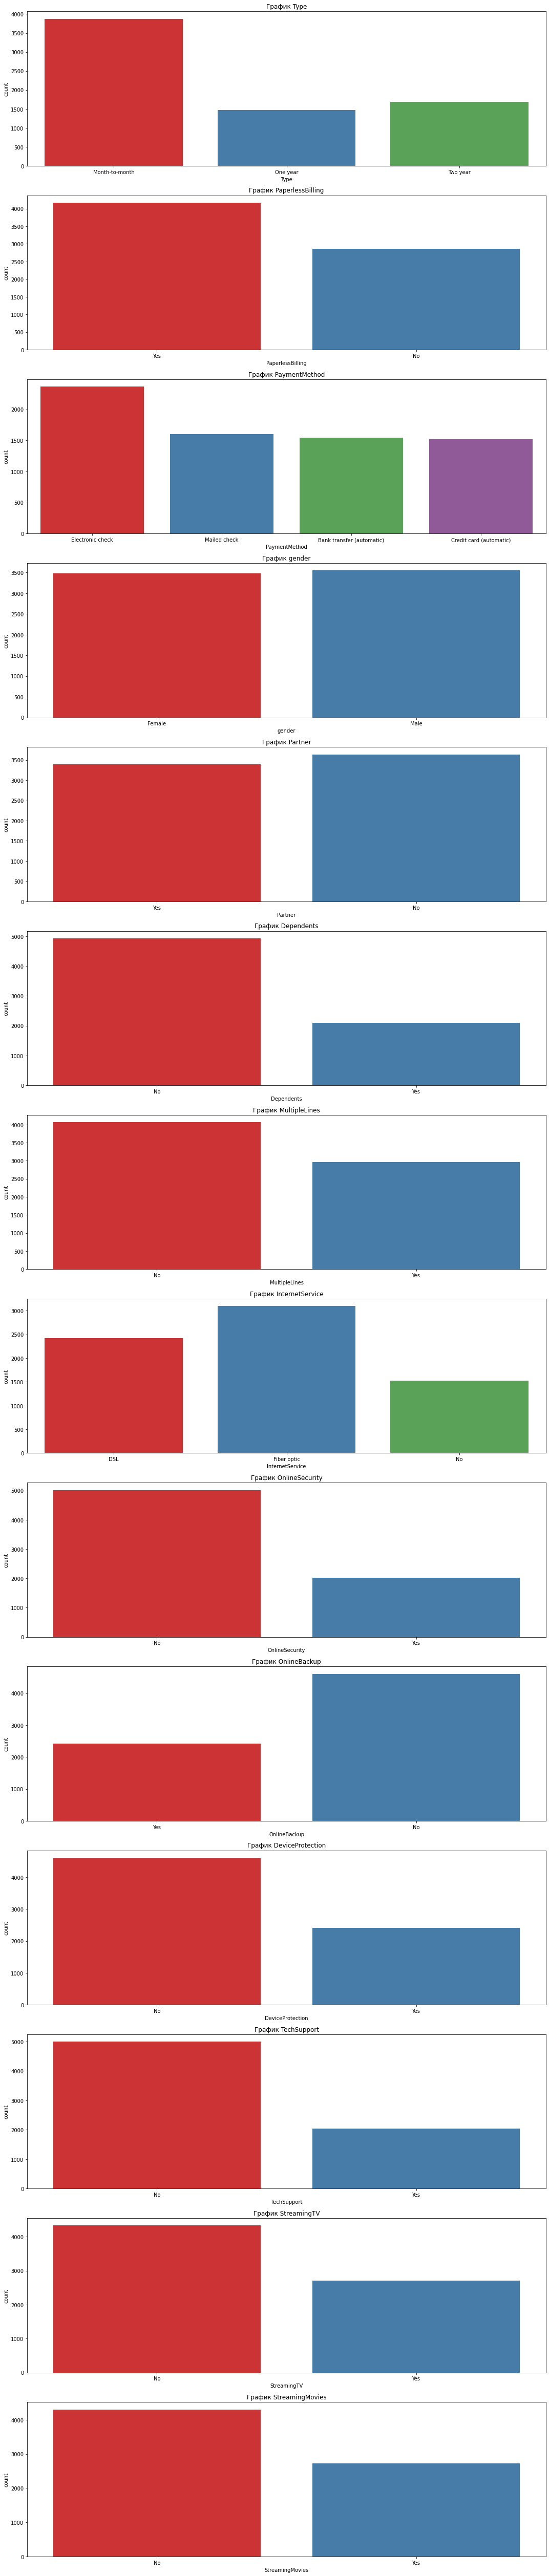

In [28]:
plot_cat_columns(df)

Вывод по категориальным признакам:
    
    - клиенты чаще предпочитают платить помесячно;
    - клиенты с электронным расчетным листом встречаются немного чаще, данный признак скорее всего лишний, на этапе подготовки, мы скорее всего от него избавимся;
    - клиенты немного чаще расплачиваются электронно, но остальных клиентов, таже достаточное количество, огромного разрыва нет. Данный признак тоже сомнительный, возможно, от него мы также откажемся далее;
    - гендерный состав клиентов имеет практически абсолютный паритет;
    - клиентов которые не замужем/не женаты немного больше, но незначительно;
    - бездетных клиентов почти в 2 раза больше, чем тех, у кого есть дети;
    - клиенты по большей части предпочитают иметь одну линию, но тех у кого несколько линий отстают не очень сильно;
    - больше всего клиентов подключены через оптоволокно, с небольшим отставанием идут DSL и замыкают тройку клиенты без подключения к Интернету;
    - большинство клиентов не используют блокировку опасных сайтов, антивирус, резервное облачное копирование, выделенную линию технической поддержки, стриминговое телевидение, каталог фильмов;

Посмотрим еще, на scatter'ы, для этого возьмем функцию, которую я писал для проекта по удою коров и немного её изменим, она покажет нам как распределены ушедшие и оставшиеся клиенты (т.е. целевой признак) исходя из каждого признака:

In [29]:
def scatterplot_with_hue(df, hue):
    # Получаем числовые и категориальные столбцы
    numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categorical_features = df.select_dtypes(include=['object']).columns.tolist()
    
    # Удаляем 'UsageTime' из списка признаков
    numerical_features.remove('UsageTime')
    
    # Объединяем числовые и категориальные признаки
    all_features = numerical_features + categorical_features

    num_cols = 2
    num_rows = math.ceil(len(all_features) / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4*num_rows))

    # Счетчик для заполнения графиков
    plot_index = 0

    for feature in all_features:
        # Пропускаем графики для customerID
        if feature == 'customerID':
            continue

        row = plot_index // num_cols
        col = plot_index % num_cols

        if feature in numerical_features:
            sns.scatterplot(x='UsageTime', y=feature, hue=hue, data=df, ax=axes[row, col])
        else:
            sns.countplot(x=feature, hue=hue, data=df, ax=axes[row, col])

        axes[row, col].set_title(f"Диаграмма для UsageTime и {feature}", fontsize=12)
        axes[row, col].tick_params(axis='both', which='major', labelsize=10)
        axes[row, col].grid(True)

        plot_index += 1

    # Удаляем пустые оси
    for j in range(plot_index, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

    plt.suptitle("Диаграммы рассеяния и гистограммы", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

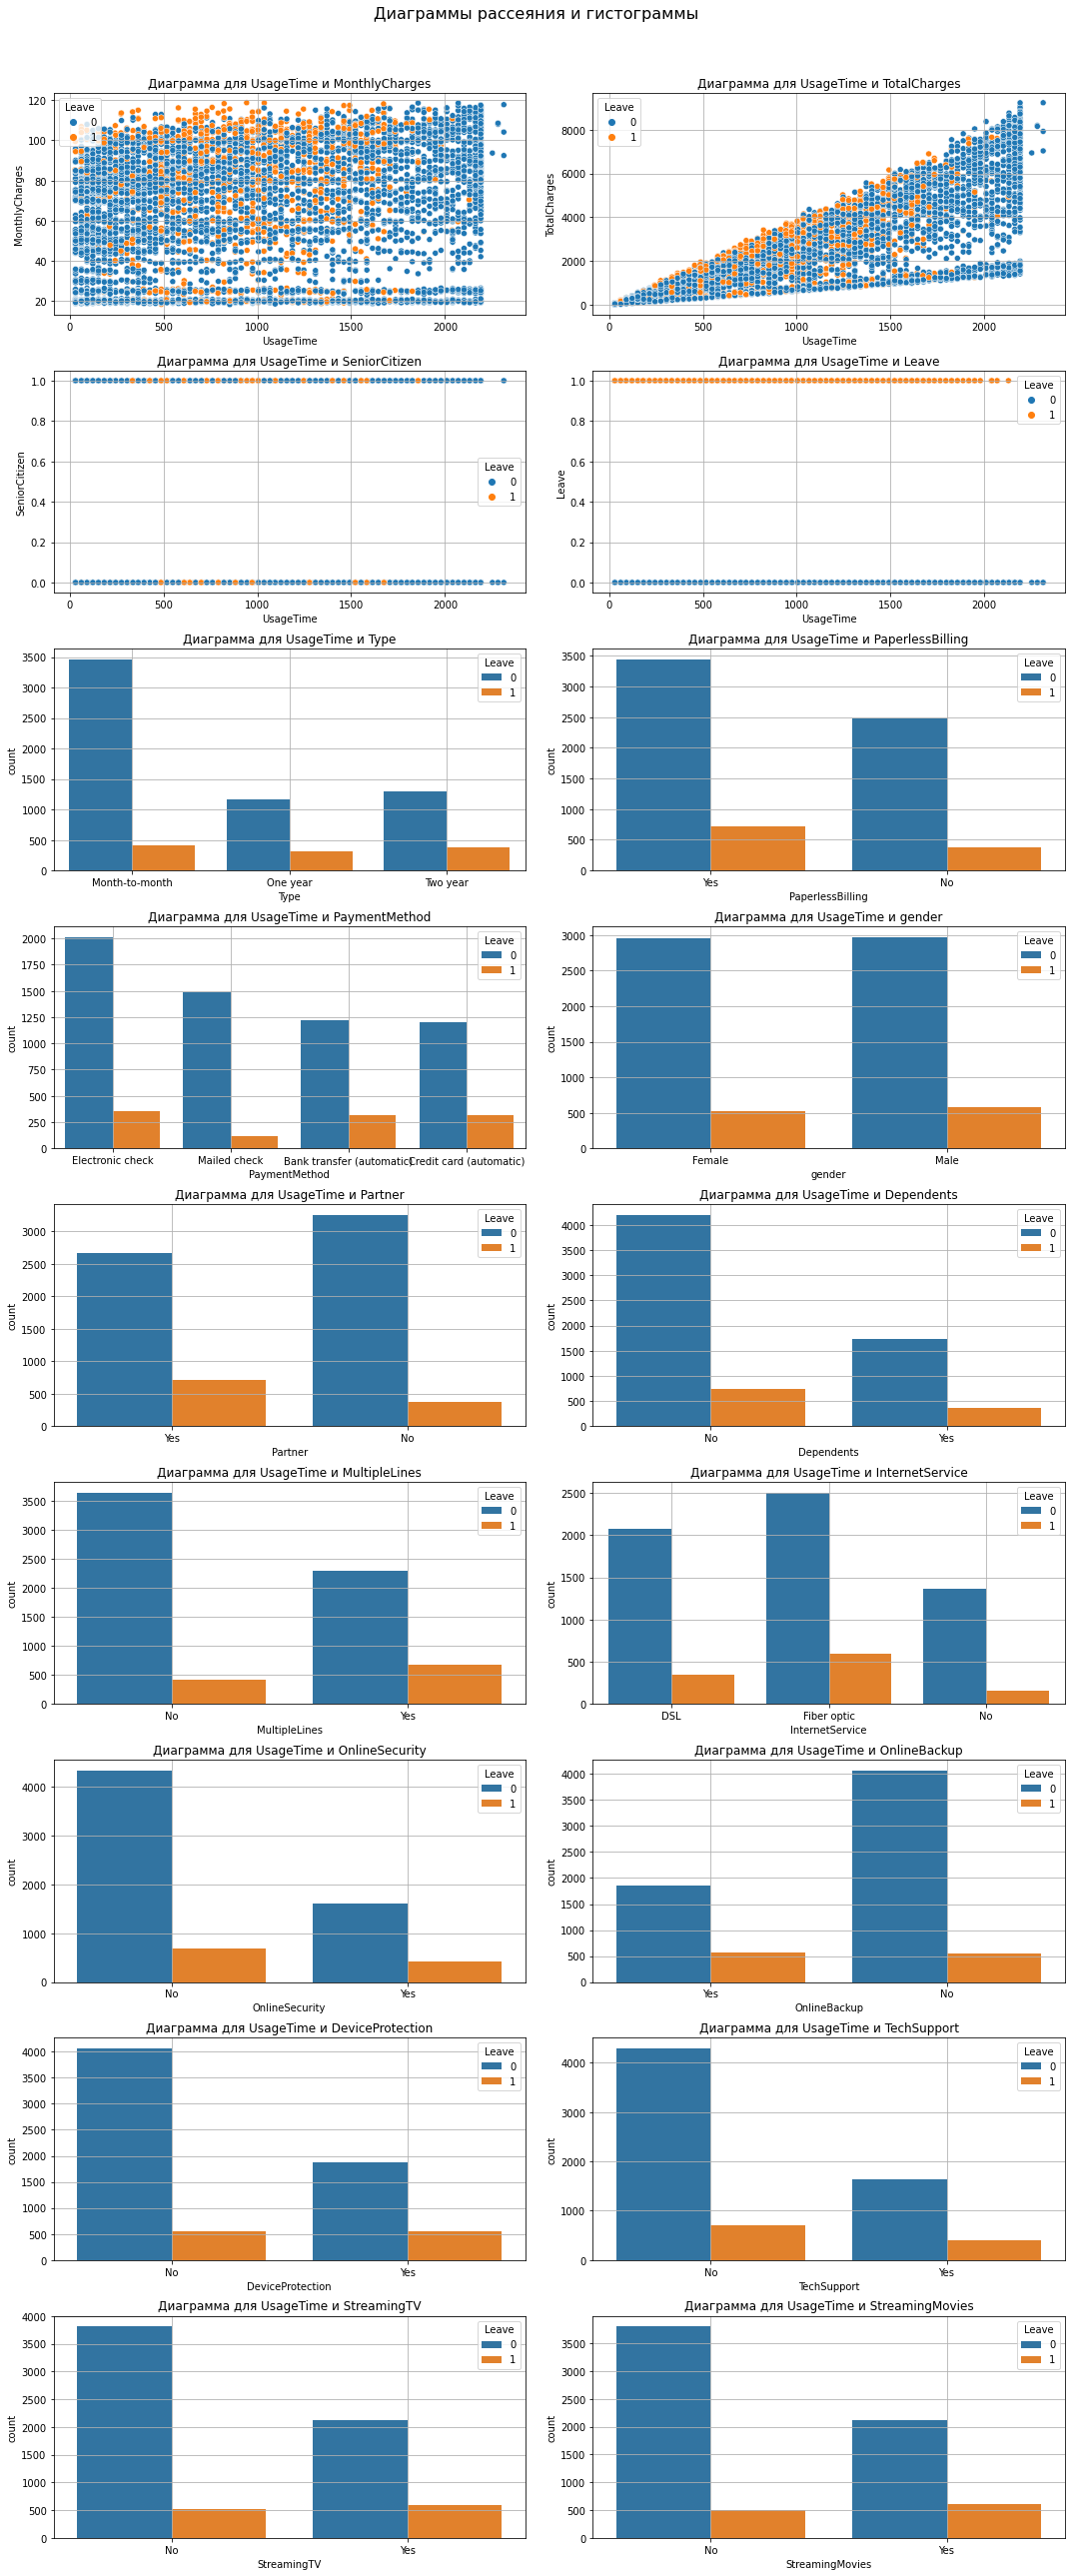

In [30]:
scatterplot_with_hue(df, 'Leave')

Вывод по диаграммам:

    - scatterplot в данном случае слабо информативны, какой-либо устойчивой зависимости ушедших клиентов от трат нет, также не видно зависимости от того, является ли клиент пенсионером или нет, и не видно, зависимости от длительности контракта;
    - а вот barplot'ы оказались более сговорчивыми, и если не перечислять каждый признак отдельно, а просто обозначить общую картину, то уверенно можно сказать следующее. Клиенты, находящиеся исходя из признака в более многочисленных подгруппах, как минимум в процентном соотношении разрывают контракт реже. Приведем пример, посмотрим на график "Диаграмма для UsageTime и StreamingTV". Клиентов которые не используют эту услугу больше, чем тех кто использует, а вот ушедших среди них меньше, чем среди тех, кто использует. Такая тенденция в большей или меньшей степени проявляется во всех признаках.

## Корреляционный анализ

Для изучения наличия корреляции воспользуемся библиотекой phik:

In [31]:
df_phik = df.drop(['customerID','BeginDate', 'EndDate'], axis=1)

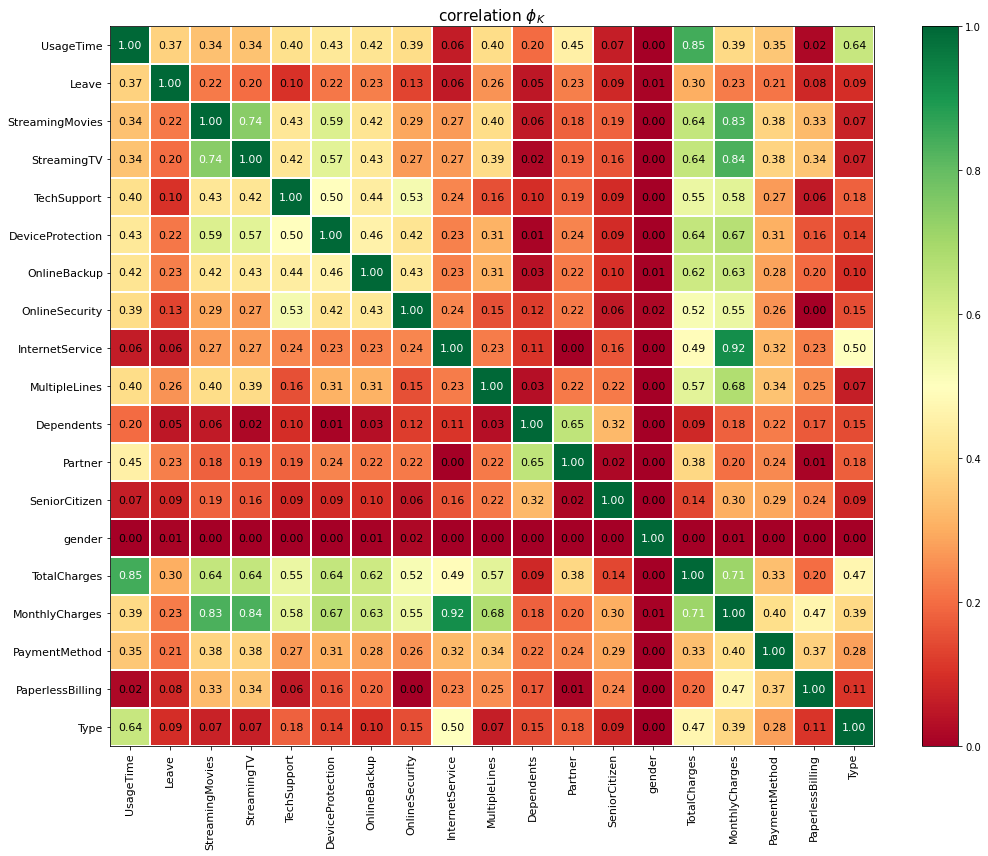

In [32]:
interval_cols = ['MonthlyCharges', 'TotalCharges','UsageTime']

# Вычисление матрицы корреляции phik для первой части (покупательская активность = 'снизилась')
phik_df = df_phik.phik_matrix(interval_cols=interval_cols)

# Визуализация тепловой карты корреляций для первой части
plot_correlation_matrix(
    phik_df.values,
    x_labels=phik_df.columns,
    y_labels=phik_df.index,
    vmin=0, vmax=1,
    title=r"correlation $\phi_K$",
    fontsize_factor=1.1,
    figsize=(15, 12)
)

По матрице корреляций можно выделить несколько особенностей:

  - Наибольшая корреляция между параметрами InternetService и MonthlyCharges - 0,92. Значение коэффициента корреляции уходит за отметку мультиколлинеарности (0,9). Скорее всего такая высокая степень зависимости обусловлена тем, что от типа подключения зависит как качество связи Интернет, так соответственно и стоимость. Значение коэффициента нужно учесть при построении моделей, чтобы не переобучить их;
  - Также видна высокая степень коллинеарности с доп.услугами (streamingTV, streamingMovies и пр.) и TotalCharges;
  - TotalCharges естественным образом зависит от MonthlyCharges и UsageTime;
  - Наиболее слабые корреляции имеют параметры пола, семейного положения, возраста, наличие детей, и PaperlessBilling;
  - С целевой переменной - Leave - наибольшая корреляция у TotalCharges и UsageTime.
  
 Перед построением модели, думаю, стоит отобрать параметры, корреляция которых лежит в определенных пределах.
 Возьмем за нижний порог 0,15 - всё что ниже будет вносить шум в обучение модели, а за верхний предел 0,8. Несмотря на то, что мультиколлинеарность начинается от значения 0,9, в этом случае, думаю, можно немного понизить предел.



In [33]:
def non_multicollinear_features(m, target_feature, v_min, v_max):
    
    columns = [] 
    append = True
    
    for c in m.columns:
        if ((m[c][target_feature] > v_min) & (c != target_feature)): 
            for i in m.index:
                if ((c != i) & (c != target_feature) & (c not in columns) & (i not in columns)):
                    if m[c][i] > v_max:
                        if m[c][target_feature] < m[i][target_feature]:
                            append = False
                            break
            if append == True: columns.append(c) 
            append = True 
    
    return columns

columns = non_multicollinear_features(phik_df, 'Leave', 0.15, .8)

print('Признаки, обладающие статистически значимой корреляцией с целевым признаком:')
columns

Признаки, обладающие статистически значимой корреляцией с целевым признаком:


['PaymentMethod',
 'MonthlyCharges',
 'Partner',
 'MultipleLines',
 'OnlineBackup',
 'DeviceProtection',
 'StreamingTV',
 'StreamingMovies',
 'UsageTime']

In [34]:
df_phik.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              7032 non-null   object 
 1   PaperlessBilling  7032 non-null   object 
 2   PaymentMethod     7032 non-null   object 
 3   MonthlyCharges    7032 non-null   float64
 4   TotalCharges      7032 non-null   float64
 5   gender            7032 non-null   object 
 6   SeniorCitizen     7032 non-null   int64  
 7   Partner           7032 non-null   object 
 8   Dependents        7032 non-null   object 
 9   MultipleLines     7032 non-null   object 
 10  InternetService   7032 non-null   object 
 11  OnlineSecurity    7032 non-null   object 
 12  OnlineBackup      7032 non-null   object 
 13  DeviceProtection  7032 non-null   object 
 14  TechSupport       7032 non-null   object 
 15  StreamingTV       7032 non-null   object 
 16  StreamingMovies   7032 non-null   object 


Создадим новый дф куда войдут основные признаки и те признаки, которые имеют достаточную степень корреляции:

In [35]:
df_new = df[['TotalCharges', 'PaymentMethod',
              'MonthlyCharges', 'Partner', 'MultipleLines', 'OnlineBackup',
              'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'UsageTime', 'Leave']]

In [36]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TotalCharges      7032 non-null   float64
 1   PaymentMethod     7032 non-null   object 
 2   MonthlyCharges    7032 non-null   float64
 3   Partner           7032 non-null   object 
 4   MultipleLines     7032 non-null   object 
 5   OnlineBackup      7032 non-null   object 
 6   DeviceProtection  7032 non-null   object 
 7   StreamingTV       7032 non-null   object 
 8   StreamingMovies   7032 non-null   object 
 9   UsageTime         7032 non-null   int64  
 10  Leave             7032 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 917.3+ KB


Вывод:
    После проведенного корреляционного анализа был выяснен характер зависимостей между различными параметрами, а также между параметрами и целевым признаком. После вычисления коэффициентов корреляции, было принято решение отсеять некоторые параметры перед построением моделей машинного обучения. Были отсеян параметры с коэффициентами корреляции ниже 0,15 и выше 0,8. Те что ниже предела будут вносить ненужный шум в обучение моделей, те что выше будут переобучать модель.

## Подготовка данных

In [37]:
Test_size = 0.25
RANDOM_STATE=120824

In [38]:
cat_cols = ['PaymentMethod', 'Partner', 'MultipleLines', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']
num_cols = ['TotalCharges', 'MonthlyCharges', 'UsageTime']

In [39]:
X = df_new.drop('Leave', axis=1)
y = df_new['Leave']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=Test_size, random_state=RANDOM_STATE, stratify=y
)


## Обучение моделей 

Создадим пайплайн:

In [40]:
def pipe_learn_ohe(param_distributions):
    
    ohe_pipe = Pipeline(
        [
            (
                'simpleImputer_ohe', 
                SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            ),
            (
                'ohe', 
                OneHotEncoder(drop='first', handle_unknown='error')
            )
        ]
    ) 
    
    data_preprocessor = ColumnTransformer([
            ('ohe', ohe_pipe, cat_cols),
            ('num', StandardScaler(), num_cols)], 
        remainder='passthrough')
    
    pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])

    
    rand_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions, 
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    n_iter=50,
    random_state=RANDOM_STATE
    )
    
    rand_search.fit(X_train, y_train)
    best_model = rand_search.best_estimator_
    best_score = rand_search.best_score_
    print('Лучшая модель и её параметры:\n\n', rand_search.best_estimator_)
    print ('Метрика лучшей модели на тренировочной выборке:', rand_search.best_score_)
    return best_model, best_score

In [41]:
def pipe_learn(param_distributions):
    
    ord_pipe = Pipeline(
        [
            (
                'simpleImputer_before_ord', 
                SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            ),
            (
                'ord',  
                OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
            ),
            (
                'simpleImputer_after_ord', 
                SimpleImputer(missing_values=np.nan, strategy='most_frequent')
            )
        ]
    )  
 
    data_preprocessor = ColumnTransformer([
            ('ord', ord_pipe, cat_cols),
            ('num', StandardScaler(), num_cols)], 
        remainder='passthrough')
    
    pipe_final = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))])

    
    rand_search = RandomizedSearchCV(
        pipe_final, 
        param_distributions, 
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        n_iter=50,
        random_state=RANDOM_STATE
    )
    
    rand_search.fit(X_train, y_train)
    best_model = rand_search.best_estimator_
    best_score = rand_search.best_score_
    print('Лучшая модель и её параметры:\n\n', rand_search.best_estimator_)
    print('Метрика лучшей модели на тренировочной выборке:', rand_search.best_score_)
    return best_model, best_score

### Logistic Regression

In [42]:
param_grid = [
       # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'models__C': [0.1, 1.0, 10.0, 100.0],
        'preprocessor__num': [StandardScaler(), 'passthrough']
    }]

In [43]:
%%time
start_time = time.time() 
best_logistic_model, best_logistic_score = pipe_learn_ohe(param_grid)
finish_time = time.time()
best_logistic_model_find_time = finish_time - start_time

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=50. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['PaymentMethod', 'Partner',
                                                   'MultipleLines',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'StreamingTV',
                                                   'StreamingMovies']),
                         

In [44]:
score_df = []

In [45]:
%%time
start_time = time.time() 
# Получаем вероятности предсказания для тренировочной выборки
train_logistic_fit_time = time.time() - start_time

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.34 µs


In [46]:
score_df.append(['LogisticRegression', best_logistic_score, best_logistic_model_find_time, train_logistic_fit_time])
score_df

[['LogisticRegression',
  0.736009351010013,
  28.458664894104004,
  9.5367431640625e-07]]

### Decision Three Classifier

In [47]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': [3, 5, 10, 15],
        'models__max_features':[3, 5, 10, 15],
        'preprocessor__num': [StandardScaler(), 'passthrough']
    }]

In [48]:
%%time
start_time = time.time() 
best_tree_model, best_tree_score = pipe_learn(param_grid)
finish_time = time.time()
best_tree_model_find_time = finish_time - start_time

/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 32 is smaller than n_iter=50. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['PaymentMethod', 'Partner',
                                   

In [49]:
%%time
start_time = time.time() 
tree_fit_time = time.time()-start_time

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs


In [50]:
score_df.append(['DecisionTreeClassifier', best_tree_score, best_tree_model_find_time, tree_fit_time])
score_df

[['LogisticRegression',
  0.736009351010013,
  28.458664894104004,
  9.5367431640625e-07],
 ['DecisionTreeClassifier',
  0.7762321485784346,
  6.582454204559326,
  7.152557373046875e-07]]

### KNN

In [51]:
# Определение параметров для KNN
param_grid_knn = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 11),  # Количество соседей от 1 до 10
        'models__weights': ['uniform', 'distance'],  # Варианты весов
        'models__metric': ['euclidean', 'manhattan'],  # Метрики расстояния
        'preprocessor__num': [StandardScaler(), 'passthrough']
    }]


In [52]:
%%time
start_time = time.time() 
best_knn_model, best_knn_score = pipe_learn(param_grid_knn)
finish_time = time.time()
best_knn_model_find_time = finish_time - start_time
knn_fit_time = time.time()-start_time

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['PaymentMethod', 'Partner',
                                   

In [53]:
# Добавление результатов в DataFrame
score_df.append(['KNeighborsClassifier', best_knn_score, best_knn_model_find_time, knn_fit_time])
score_df

[['LogisticRegression',
  0.736009351010013,
  28.458664894104004,
  9.5367431640625e-07],
 ['DecisionTreeClassifier',
  0.7762321485784346,
  6.582454204559326,
  7.152557373046875e-07],
 ['KNeighborsClassifier',
  0.7664137852570414,
  13.125217914581299,
  13.125219345092773]]

Все три модели слишком далеки по метрике ROC-AUC от требуемых 0,85. Будем пробовать кое-что помощнее.

### CatboostClassifier

In [54]:
param_grid = [
    # словарь для модели CatBoostClassifier()
    {
        'models': [CatBoostClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,6),
        'models__learning_rate':[0.1, 0.2, 0.3],
        'models__n_estimators': [200, 300, 700],
        'preprocessor__num': [StandardScaler(), 'passthrough']
         }]

In [55]:
%%time
start_time = time.time() 
best_cat_model, best_cat_score = pipe_learn(param_grid)
finish_time = time.time()
best_cat_model_find_time = finish_time - start_time

0:	learn: 0.5628153	total: 47.5ms	remaining: 14.2s
1:	learn: 0.4932620	total: 48.8ms	remaining: 7.27s
2:	learn: 0.4472962	total: 50ms	remaining: 4.95s
3:	learn: 0.4152733	total: 51.1ms	remaining: 3.78s
4:	learn: 0.3948827	total: 52.3ms	remaining: 3.09s
5:	learn: 0.3788556	total: 53.5ms	remaining: 2.62s
6:	learn: 0.3698987	total: 54.6ms	remaining: 2.29s
7:	learn: 0.3601908	total: 55.8ms	remaining: 2.04s
8:	learn: 0.3560315	total: 57ms	remaining: 1.84s
9:	learn: 0.3503975	total: 58.1ms	remaining: 1.69s
10:	learn: 0.3482405	total: 59.3ms	remaining: 1.56s
11:	learn: 0.3462194	total: 60.5ms	remaining: 1.45s
12:	learn: 0.3431684	total: 61.6ms	remaining: 1.36s
13:	learn: 0.3417869	total: 62.8ms	remaining: 1.28s
14:	learn: 0.3390733	total: 64ms	remaining: 1.22s
15:	learn: 0.3382426	total: 65.2ms	remaining: 1.16s
16:	learn: 0.3374021	total: 66.5ms	remaining: 1.11s
17:	learn: 0.3363644	total: 67.6ms	remaining: 1.06s
18:	learn: 0.3336169	total: 68.8ms	remaining: 1.02s
19:	learn: 0.3326175	total: 

Похоже, успех. Занесем результаты в таблицу и будем смотреть что будет на тестовых данных.

In [56]:
%%time
start_time = time.time() 
cat_fit_time = time.time()-start_time

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.11 µs


In [57]:
score_df.append(['CatBoostClassifier', best_cat_score, best_cat_model_find_time, cat_fit_time])
score_df

[['LogisticRegression',
  0.736009351010013,
  28.458664894104004,
  9.5367431640625e-07],
 ['DecisionTreeClassifier',
  0.7762321485784346,
  6.582454204559326,
  7.152557373046875e-07],
 ['KNeighborsClassifier',
  0.7664137852570414,
  13.125217914581299,
  13.125219345092773],
 ['CatBoostClassifier',
  0.9174842566267511,
  319.47359824180603,
  7.152557373046875e-07]]

In [58]:
score_df = pd.DataFrame(score_df, columns=['model', 'ROC-AUC', 'process_time', 'test_fit_time'])

score_df = score_df.sort_values(by='ROC-AUC', ascending=False)

score_df

model   ROC-AUC  process_time  test_fit_time
3      CatBoostClassifier  0.917484    319.473598   7.152557e-07
1  DecisionTreeClassifier  0.776232      6.582454   7.152557e-07
2    KNeighborsClassifier  0.766414     13.125218   1.312522e+01
0      LogisticRegression  0.736009     28.458665   9.536743e-07

Посмотрим какие результаты модели выдаст на тестовой выборке, помимо ROC-AUC взглянем еще на Accuracy и F1-score (ментор на вебинаре сказал по желанию посмотреть еще метрики, помимо основной ROC-AUC)

In [59]:
print("Результат CatBoost на тестовой выборке:")
print('ROC-AUC : {:.2f}'.format(roc_auc_score(y_test,
                                        best_cat_model.predict_proba(X_test)[:, 1])))
print('Accuracy : {:.2%}'.format(accuracy_score(y_test,
                                                best_cat_model.predict(X_test))))
print('F1 Score: {:.2%}'.format(f1_score(y_test, best_cat_model.predict(X_test))))

Результат CatBoost на тестовой выборке:
ROC-AUC : 0.93
Accuracy : 93.46%
F1 Score: 74.61%


Ого!, результат не тестовой еще немного подрос. Чтож, думаю эту модель можно оставить.

Построим кривую ROC-AUC для лучшей модели:

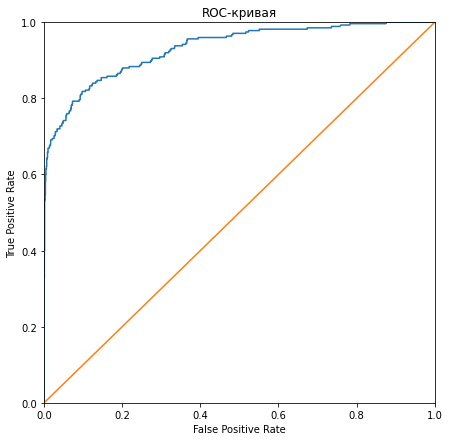

In [60]:
fpr, tpr, thresholds = roc_curve(y_test, best_cat_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(7,7))
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle='-')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

ROC-кривая сильно выпуклая вверх. Под ней большая часть всего прямоугольника, в который она вписана. Это означает, что модель, по всей видимости, в большинстве случаев правильно предсказывает целевые значения.

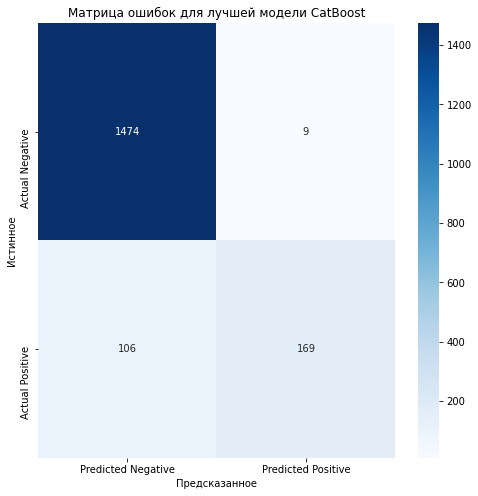

Метрика Accuracy для лучшей модели Catboost: 0.93


In [61]:
y_test_pred = best_cat_model.predict(X_test)

# Вычисление матрицы ошибок
cm = confusion_matrix(y_test, y_test_pred)

# Визуализация матрицы ошибок
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Предсказанное')
plt.ylabel('Истинное')
plt.title('Матрица ошибок для лучшей модели CatBoost')
plt.show()

# Вычисление точности
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Метрика Accuracy для лучшей модели Catboost: {accuracy:.2f}')

Вывод по обучению моделей:
    
К сожалению, ни одна из простых моделей не смогла обеспечить нужное значение метрики ROC-AUC выше 0,85. Пришлось прибегать к "тяжелому" CatBoost. Она оказалась сразу на 2 головы лучше - 0,92 на тренировочной выборке и 0,93 на тестовой. Поэтому лучшей моделью в данном исследовании является CatBoostClassifier.

## Анализ важности признаков лучшей модели

In [62]:
best_cat_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ord',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=nan)),
                                                                  ('simpleImputer_after_ord',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['PaymentMethod', 'Partner',
                                                   'MultipleLines',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'StreamingTV',
                                                   'StreamingMovies']),
                                                 ('num', 'passthrough',
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'UsageTime'])])),
                ('models',
                 <catboost.core.CatBoostClassifier object at 0x7f8768169d30>)])

In [63]:
catboost_model = best_cat_model.named_steps['models']

# Подготовим данные для SHAP
preprocessor = best_cat_model.named_steps['preprocessor']
X_train_transformed = preprocessor.transform(X_train)

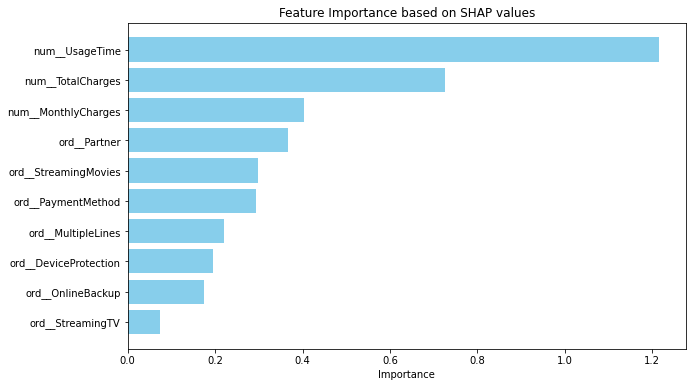

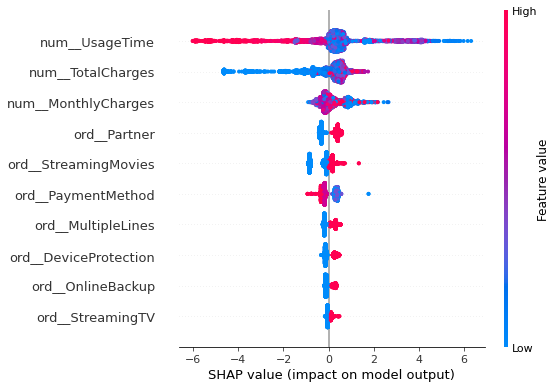

                 Feature  Importance
9         num__UsageTime    1.215817
7      num__TotalCharges    0.726386
8    num__MonthlyCharges    0.402623
1           ord__Partner    0.365632
6   ord__StreamingMovies    0.297236
0     ord__PaymentMethod    0.293368
2     ord__MultipleLines    0.220730
4  ord__DeviceProtection    0.194528
3      ord__OnlineBackup    0.175073
5       ord__StreamingTV    0.074782


In [64]:

explainer = shap.Explainer(catboost_model)


shap_values = explainer(X_train_transformed)

feature_importance = np.abs(shap_values.values).mean(axis=0)
feature_names = preprocessor.get_feature_names_out()


importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance based on SHAP values')
plt.gca().invert_yaxis()  
plt.show()


shap.summary_plot(shap_values, X_train_transformed, feature_names=feature_names)


print(importance_df)

Наиболее значимым фактором является UsageTime и связанный с ним TotalCharges и замыкает тройку Partner и MonthlyCharges.

## Общий вывод по проекту

В рамках работы над данным проектом, были сделаны следующие шаги:

- Импорт библиотек и подключение необходимых модулей. Были подгружены phik, shap и обновлена scikit_learn, импортированы различные математичекие модули, графические (matplotlib, seaborn), и модули машинного обучения.
- Загрузка данных. Были загружены 4 датафрейма, загрузка прошла без ошибок;
- Первичный осмотр и предобработка данных. Данные были осмотрены посредством методов .info(), describe(), isdublicated(), isna() и некоторых других. В процессе осмотра было выявлено, что у некоторых столбцов был неверно определен тип данных. При дальнейшей предобработке и склейке данных эта проблема была проработана;
- Исследовательский и коррелляционный анализ данных. на этом шаге достаточно подробно рассмотрены гистограммы и графики, построенные посредством написания нескольких функций. По графикам определены некоторые оссобенности распределения данных, выявлены какие признаки больше влияют на целевой признак, а какие меньше, были отсеяны признаки, которые не имеют корреляции с целевым признаком, а также отсеяны признаки, с мультиколлинеарностью;
- Подготовка данных для дальнейшего обучения моделей. Здесь данные прошли стандартную подготовку перед обучением моделей;
- Обучение моделей с использованием пайплайнов. Здесь были построены 4 модели и посредством RandomizedSearch были определены лучшие гиперпараметры для каждой модели. Лучшей моделью стала CatBoostClassifier - она обошла RandomForest, KNN, LogisticRegression с разрывом по целевой метрике ROC-AUC почти на 20% .  Значение ROC-AUC для CatBoost - 0,93 на тестовой выборке, время обучения разительно больше остальных "простых" моделей, но 5 минут - достаточно приемлемый результат. Время предсказания у всех моделей практически моментальное;
- Анализ важности признаков модели. Были построены графики SHAP и выяснено, на какие признаки модель ориентируется в первую очередь (TotalCharges и UsageTime), а на какие практически не смотрит (StreamingMovies, StreamingTV).

Общий вывод по проекту и рекомендации заказчику.

Исходя из проведенного исследования, заказчику можно дать следующие рекомендации:

- В первую очередь, стоит постараться увеличить срок контракта, здесь возможно помогут акции типа "оплати 2 месяца и получи третий в подарок". Люди с неохотой платят на год вперед, чаще помесячно, что в каком-то смысле "рязвязывает им руки" уйти каждый месяц. Поэтому частоту потенциальных окон для ухода лучше сократить до квартала к примеру.
- Траты в месяц и общие траты -тоже достаточно важные признаки. Но скорее всего будет некорректно ориентироваться на чек для построения прогноза. Несмотря на то, что большинство услуг оказались слабокоррелируемы с целевым признаком, их следствие - общая стоимость имеет большое влияние на прогноз оттока. Поэтому, думаю, что заказчику стоит стараться нарастить число дополнительных услуг для каждого клиента, но делать это разумно, не слишком раздувая итоговую стоимость. Клиент всегда будет искать больше качественных услуг за меньшие деньги, нужно стараться выдать ему подходящее предложение, возможно предлагать услуги пакетом, а не отдельно каждую.
- Неожиданно, но наличие партнера влияет на отток. На самом деле, это можно объяснить тем, что один человек из пары может перестать нуждаться в услугах провадера, а вот второму они будут всё еще нужны. Первый из уважения ко второму может продлевать контракт. Стоит рассмотреть возможность увеличения притока семейных пар, к примеру скидками или промокодами на допуслуги. Скорее всего, это могло бы быть актуально и для людей с детьми. Провайдеру стоит рассмотреть возможность внедрения пакета услуг для детей, к примеру мультфильмы или обучающие видео.